In [106]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
import pandas as pd
import seaborn as sns

In [64]:
# pw2.align2.globalxx makes an optimal global alignment between your two sequences, where every match counts 1 point , 
# while mismatches and insertions/deletions cost nothing.

In [1]:
# #testing clustermaps
# import pandas as pd
# import seaborn as sns
# # pd.DataFrame()
# iris = sns.load_dataset('iris') 
# data3 = pd.DataFrame({'molecules':['4NGG-4NGB','4NHA-4NH3','4NGC-4NGF','4NGB-4NGD'],
#             'rmsd_distance':[0.01,0.3,0.02,0.33],'sequence_dissimilarity':[0.2,0.1,0.2,0.3]})
# data3

In [211]:
data = pd.read_excel('clustermap_miRNA_final.ods',sheet_name='<29-34nt>')
data2 = data[['molecule_candidate','dissimilarity','Normalized RMSD= rmsd/no_of_atoms_aligned']]
data2[0:30]

,molecule_candidate,dissimilarity,Normalized RMSD= rmsd/no_of_atoms_aligned
0,2MNC_2JXV,0.510,0.040302
1,2MNC_5UZT,0.130,0.014810
2,2MNC_2KPV,0.520,0.040741
3,2MNC_5UZZ,0.130,0.014242
4,2JXV_5UZT,0.530,0.014060
5,2JXV_2KPV,0.088,0.002069
6,2JXV_5UZZ,0.534,0.012089
7,5UZT_2KPV,0.550,0.010536
8,5UZT_5UZZ,0.000,0.006917
9,2KPV_5UZZ,0.550,0.008000


In [212]:
data2 = data2[0:30]
# data2['molecule_candidate']

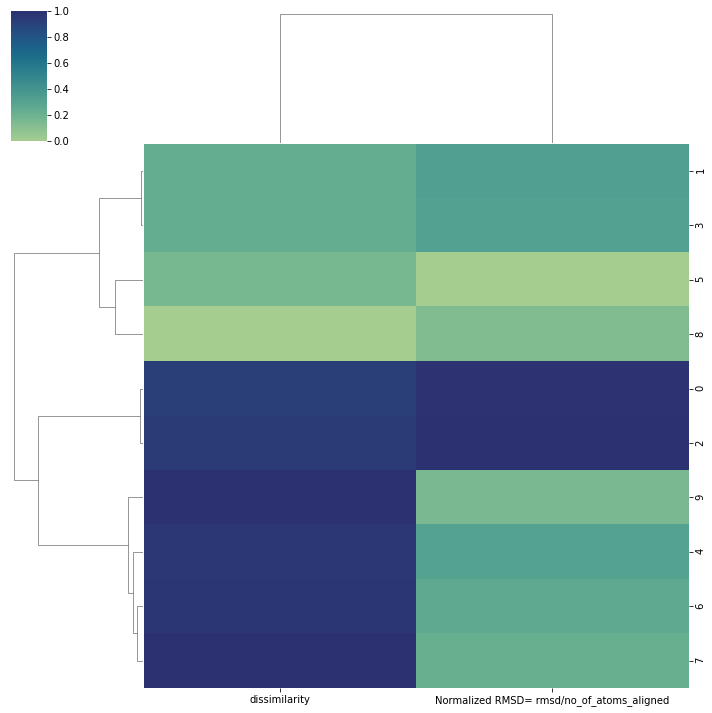

In [213]:
molecule = data2.pop('molecule_candidate')
sns.color_palette("flare")
sns.clustermap(data2,standard_scale=1,cmap="crest")

In [2]:
def sequence_alignment_score_dsRNA(chainA,chainB,chainL,chainM):
    
    alignmentsAL = pairwise2.align.globalxx(chainA,chainL)
    alignmentsAM = pairwise2.align.globalxx(chainA,chainM)
    alignmentsBL = pairwise2.align.globalxx(chainB,chainL)
    alignmentsBM = pairwise2.align.globalxx(chainB,chainM)
    
    scoreAL = 0
    scoreAM = 0
    scoreBL = 0
    scoreBM = 0
    
    for alignment in alignmentsAL:
        if(alignment[2]>=scoreAL):
            matches = alignment[2]
            #start-end
            seqlen_AL = alignment[4] - alignment[3]
            scoreAL = matches/seqlen_AL
            
    for alignment in alignmentsAM:
        if(alignment[2]>=scoreAM):
            matches = alignment[2]
            #start-end
            seqlen_AM = alignment[4] - alignment[3]
            scoreAM = matches/seqlen_AM
            
    for alignment in alignmentsBL:
        if(alignment[2]>=scoreBL):
            matches = alignment[2]
             #start-end
            seqlen_BL = alignment[4] - alignment[3]
            scoreBL = matches/seqlen_BL
            
    for alignment in alignmentsBM:
        if(alignment[2]>=scoreBM):
            matches = alignment[2]
             #start-end
            seqlen_BM = alignment[4] - alignment[3]
            scoreBM = matches/seqlen_BM
            
#     print(scoreAL,scoreAM,scoreBL,scoreBM)
    scores = [scoreAL,scoreAM,scoreBL,scoreBM]
    scores.sort(reverse=True)
    print(scores)
    #taking top 2 and averaging out
    dissimilarity = 1-(scores[0]+scores[1])/2
    return dissimilarity

In [3]:
def sequence_alignment_score_ssRNA(chainA,chainB):
    alignmentsAB = pairwise2.align.globalxx(chainA,chainB)
    scoreAB = 0
    for alignment in alignmentsAB:
#         print(alignment)
        if(alignment[2]>=scoreAB):
            scoreAB = alignment[2]
            start = alignment[3]
            end = alignment[4]
            print(alignment)
    print(scoreAB)
#     seq_length = min(len(chainA), len(chainB))
    alignment_length =end-start
    matches = scoreAB
    dissimilarity = 1- (matches / alignment_length)
    return dissimilarity


In [ ]:
>7V01_4|Chain F[auth G]|RNA (37-MER)|Staphylococcus epidermidis RP62A (176279)
ACGAGAACACGUAUGCCGAAGUAUAUAAAUCAUCAGU
>7V01_7|Chain J[auth U]|RNA (37-MER)|Staphylococcus epidermidis (176279)
ACUGAUGAUUUAUAUACUUCGGCAUACGUGUUCUCGU
>6O7H_5|Chain F[auth G]|RNA (38-MER)|Thermococcus onnurineus (strain NA1) (523850)
GUGGAAAGGCGGGCAGAGGCGGUUUGCGUAUUGGGCGC
>6O7H_6|Chain G[auth H]|RNA (40-MER)|Thermococcus onnurineus (strain NA1) (523850)
CCCUGGCGCCCAAUACGCAAACCGCCUCUGCCCGCGGGCG
>6O7E_5|Chain F[auth G]|RNA (38-MER)|Thermococcus onnurineus (342948)
GUGGAAAGGCGGGCAGAGGCGGUUUGCGUAUUGGGCGC
>6O7E_6|Chain G[auth H]|RNA (40-MER)|Thermococcus onnurineus (342948)
CCCUGGCGCCCAAUACGCAAACCGCCUCUGCCCGCGGGCG

In [93]:
#aligning dsRNA :
#mol1 : chain A, chain B
#mol2 : chain L, chain M
#initialize chain values with sequences
chainA = 'CUAUACAACCUACUACCUCUCU'
chainB = 'GAGGUAGUAGGUUGUAUAGUA'
chainL = 'UUCACAGUGGCUAAGUUCCGC'
chainM = 'CUGGAACUUAAAUCUGUGAUAA'
print("disimilarity score: "+str(sequence_alignment_score_dsRNA(chainA,chainB,chainL,chainM)))

[0.48148148148148145, 0.4482758620689655, 0.4, 0.3793103448275862]
disimilarity score: 0.5351213282247765


In [ ]:
Natural/modified
>7XHT_1|Chain A[auth B]|RNA (228-MER)|metagenome (256318)
UGUGAGCGGAUAACAAUUCCCCGGCUCUUCCAACUUUAUGGUUGCGACCGUAGGUUGAAAGAGCACAGGCUGAGACAUUCGUAAGGCCGAAAGACCGGACGCACCCUGGGAUUUCCCCAGUCCCCGGAACUGCAUAGCGGAUGCCAGUUGAUGGAGCAAUCUAUCAGAUAAGCCAGGGGGAACAAUCACCUCUCUGUAUCAGAGAGAGUUUUACAAAAGGAGGAACGG
>7UTN_2|Chain B[auth C]|RNA (222-MER)|synthetic construct (32630)
AAAAGAGUGAACGAGAGGCUCUUCCAACUUUAUGGUUGCGACCGUAGGUUGAAAGAGCACAGGCUGAGACAUUCGUAAGGCCGAAAGACCGGACGCACCCUGGGAUUUCCCCAGUCCCCGGAACUGCAUAGCGGAUGCCAGUUGAUGGAGCAAUCUAUCAGAUAAGCCAGGGGGAACAAUCACCUCUCUGUAUCAGAGAGAGUUUUACAAAAGGAGGAACGG
>7YOJ_4|Chain D[auth B]|RNA (174-MER)|Armatimonadetes bacterium (2033014)
GUCUGCCGAAGACGCCGCACGGAGCCUGGGCCGGAAUCGUAGAUCGAACGCGGCAUCGAAGCCCUGCAGCCCUUCGGGGCCAAGGCGGCGCAGCAAGCCUCUUUCAGGCGGCAGAGUCCUUUAGAGUGUGAGAGACACUCUAAAGGAAUGAAAGAGGGCGACACCCUGGUGAAC
>8CTL_2|Chain B[auth C]|RNA (222-MER)|unidentified (32630)
AAAAGAGUGAACGAGAGGCUCUUCCAACUUUAUGGUUGCGACCGUAGGUUGAAAGAGCACAGGCUGAGACAUUCGUAAGGCCGAAAGACCGGACGCACCCUGGGAUUUCCCCAGUCCCCGGAACUGCAUAGCGGAUGCCAGUUGAUGGAGCAAUCUAUCAGAUAAGCCAGGGGGAACAAUCACCUCUCUGUAUCAGAGAGAGUUUUACAAAAGGAGGAACGG


In [92]:
#aligning ssRNA :
#mol1 : chain A, chain B
#initialize chain values with sequences
chainA = 'XGGCAGGGAUUUUGCCCGGAG'
chainB = 'GGGGUAGUGAUUUUACCCUGGAGAU'
print("disimilarity score: "+str(sequence_alignment_score_ssRNA(chainA,chainB)))

Alignment(seqA='XGGCAGG--G--AUUUUG-CCC-GGAG--', seqB='-GG--GGUAGUGAUUUU-ACCCUGGAGAU', score=17.0, start=0, end=29)
Alignment(seqA='XGGCAGG----GAUUUUG-CCC-GGAG--', seqB='-GG--GGUAGUGAUUUU-ACCCUGGAGAU', score=17.0, start=0, end=29)
Alignment(seqA='XGGCAG---G-GAUUUUG-CCC-GGAG--', seqB='-GG--GGUAGUGAUUUU-ACCCUGGAGAU', score=17.0, start=0, end=29)
Alignment(seqA='XGGCA-G--G-GAUUUUG-CCC-GGAG--', seqB='-GG--GGUAGUGAUUUU-ACCCUGGAGAU', score=17.0, start=0, end=29)
Alignment(seqA='XGGCAG--G-GAUUUUG-CCC-GGAG--', seqB='-GG-GGUAGUGAUUUU-ACCCUGGAGAU', score=17.0, start=0, end=28)
Alignment(seqA='XGGCAG--G-GAUUUUG-CCC-GGAG--', seqB='-GGG-GUAGUGAUUUU-ACCCUGGAGAU', score=17.0, start=0, end=28)
Alignment(seqA='XG-GCAG--G-GAUUUUG-CCC-GGAG--', seqB='-GGG--GUAGUGAUUUU-ACCCUGGAGAU', score=17.0, start=0, end=29)
Alignment(seqA='X-GGCAG--G-GAUUUUG-CCC-GGAG--', seqB='-GGG--GUAGUGAUUUU-ACCCUGGAGAU', score=17.0, start=0, end=29)
Alignment(seqA='XGGCAG--G-GAUUUUG-CCC-GGAG--', seqB='GGG--GUAGUGAUUUU-ACCCUGGAGAU', 